In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
interest = pd.read_csv("/Users/yanzhen/Desktop/interest.csv")
interest.describe()

In [31]:
difficulty = pd.read_csv("/Users/yanzhen/Desktop/difficulty.csv")
difficulty.describe()

,prediction.difficulty,nlp.difficulty,sna.difficulty,neural.difficulty,viz.difficulty,loop.difficulty,sql.difficulty
count,52.000000,50.00000,52.000000,50.000000,50.000000,50.000000,49.000000
mean,3.807692,4.22000,3.769231,4.400000,4.060000,4.080000,3.693878
std,0.864064,0.86402,0.899137,0.782461,0.818411,0.829064,1.103103
min,2.000000,2.00000,2.000000,2.000000,3.000000,3.000000,1.000000
25%,3.000000,4.00000,3.000000,4.000000,3.000000,3.000000,3.000000
50%,4.000000,4.00000,4.000000,5.000000,4.000000,4.000000,4.000000
75%,5.000000,5.00000,4.250000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [40]:
clean = pd.DataFrame({
    'difficulty':[3.807692,4.22000,3.769231,4.400000,4.060000,4.080000,3.693878],
    'interest':[4.326923,4.431373,4.134615,4.490196,4.596154,4.431373,4.431373]})
print(clean)

   difficulty  interest
0    3.807692  4.326923
1    4.220000  4.431373
2    3.769231  4.134615
3    4.400000  4.490196
4    4.060000  4.596154
5    4.080000  4.431373
6    3.693878  4.431373


In [41]:
clean.index = ['prediction','nlp','sna','neural','viz','loop','sql']
clean

,difficulty,interest
prediction,3.807692,4.326923
nlp,4.220000,4.431373
sna,3.769231,4.134615
neural,4.400000,4.490196
viz,4.060000,4.596154
loop,4.080000,4.431373
sql,3.693878,4.431373


### Content-Based Recommender

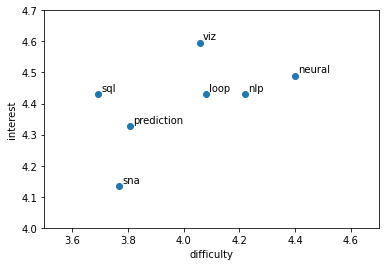

In [44]:
plt.scatter(clean.difficulty, clean.interest)

for i, index in enumerate (clean.index):
    plt.text(clean.difficulty[i]+0.01, clean.interest[i]+0.01, index)
    
plt.xlim (3.5, 4.7)
plt.ylim (4.0, 4.7)
plt.xlabel("difficulty")
plt.ylabel("interest");

In [45]:
import math # You will need math library to calculate the eulidician distance

# Create a new column called distance. And assign 0 to all rows temporarily.
clean_distance = clean.copy()
clean_distance['distance'] = 0

# Pick any row to start. Here I am using prediction as an example
item = clean_distance.loc['prediction',]

# Loop around the data frame index; Obtain the target row; Calculate the distance
# Assign to d; And assign to the corresponding cell.
for i in clean_distance.index:
    target = clean_distance.loc[i,]
    d = math.dist(item, target)
    clean_distance.loc[i, 'distance'] = d

# Sort the result by distance
clean_distance.sort_values('distance', ascending=True)

,difficulty,interest,distance
prediction,3.807692,4.326923,0.000000
sql,3.693878,4.431373,0.154478
sna,3.769231,4.134615,0.196116
loop,4.080000,4.431373,0.291653
viz,4.060000,4.596154,0.368978
nlp,4.220000,4.431373,0.425332
neural,4.400000,4.490196,0.614400


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(clean)
cosine_sim

array([[1.        , 0.99922723, 0.99984604, 0.99856396, 0.99999823,
        0.99974725, 0.99964159],
       [0.99922723, 1.        , 0.99976308, 0.99989801, 0.99929948,
        0.99985835, 0.99781683],
       [0.99984604, 0.99976308, 1.        , 0.99935025, 0.99987732,
        0.99998782, 0.99901794],
       [0.99856396, 0.99989801, 0.99935025, 1.        , 0.99866309,
        0.99951599, 0.99677186],
       [0.99999823, 0.99929948, 0.99987732, 0.99866309, 1.        ,
        0.99978781, 0.99958939],
       [0.99974725, 0.99985835, 0.99998782, 0.99951599, 0.99978781,
        1.        , 0.99878705],
       [0.99964159, 0.99781683, 0.99901794, 0.99677186, 0.99958939,
        0.99878705, 1.        ]])

In [47]:
module_indices = pd.Series(range(len(clean.index)), index = clean.index)

module_indices

prediction    0
nlp           1
sna           2
neural        3
viz           4
loop          5
sql           6
dtype: int64

In [48]:
def get_recommendations(name, cosine_sim, matrix_indices):
    idx = matrix_indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    rank_indices = [i[0] for i in sim_scores]
    return matrix_indices.iloc[rank_indices]

In [49]:
get_recommendations("prediction", cosine_sim, module_indices)

viz     4
sna     2
loop    5
sql     6
nlp     1
dtype: int64

### Collaborative Filter

In [50]:
interest_na = interest.dropna()
interest_na.index = interest_na.id
interest_clean = interest_na.drop('id', axis=1)

In [51]:
cosine_sim_interest = cosine_similarity(interest_clean, interest_clean)
id_indices = pd.Series(range(len(interest_clean.index)), index = interest_clean.index)

In [52]:
get_recommendations("s5", cosine_sim_interest, id_indices)

id
s2      1
s6      5
s12    11
s13    12
s16    15
dtype: int64